In [69]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [115]:
def get_column(files, model):
    loaded_model = load_model(model)
    column = []
    for item in files:
        df = pd.read_csv(item)
        train_data = df[["wid_x", "wid_y", "wew_x", "wew_y", "seed_x", "seed_y",
           "trkl_x", "trkl_y", "trkl_z", "trkl_px", "trkl_py", "trkl_pz", "E/p",
           "h4_41", "h4_42", "h4_43", "h4_44", "h4_45", "h4_46"]].values
        predictions = loaded_model.predict(train_data)
        positive_count = np.sum(predictions > 0.5)
        positive_rate = positive_count / len(predictions)
        column.append(positive_rate)
    return column

In [96]:
EID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/NNs/electronID_w_track_95"
MID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/NNs/muonID_w_track_99"
PPID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/NNs/pi+_ID_w_track_86"
PMID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/NNs/pi-_ID_w_track_81"
PHID = "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/NNs/photon_ID_w_track_89"

filenames = ['/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_electron_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi+_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi-_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_muon_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_photon_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_klong_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_positron_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi0_0_10000.csv']


In [118]:
ph_column = get_column(filenames, PHID)
print(ph_column)

393/393 [==============================] - 0s 253us/step
[0.14958606908364258, 0.20676312247644685, 0.23969763472323824, 0.027189124350259896, 0.9779228258782876, 0.5653147549141577, 0.15345171398727567, 0.9770828359990451]


In [109]:
pm_column = get_column(filenames, PMID)
print(pm_column)

393/393 [==============================] - 0s 270us/step
[0.8786754210676563, 0.37457940780619114, 0.7514427375436885, 0.4398240703718513, 0.07295066231522365, 0.034502778468939205, 0.31079669547051564, 0.07742500198933715]


In [35]:
m_column

[0.016150740242261104,
 0.0,
 0.049418840933105744,
 0.001492908683752177,
 0.0,
 0.8774490203918432,
 0.0,
 0.0]

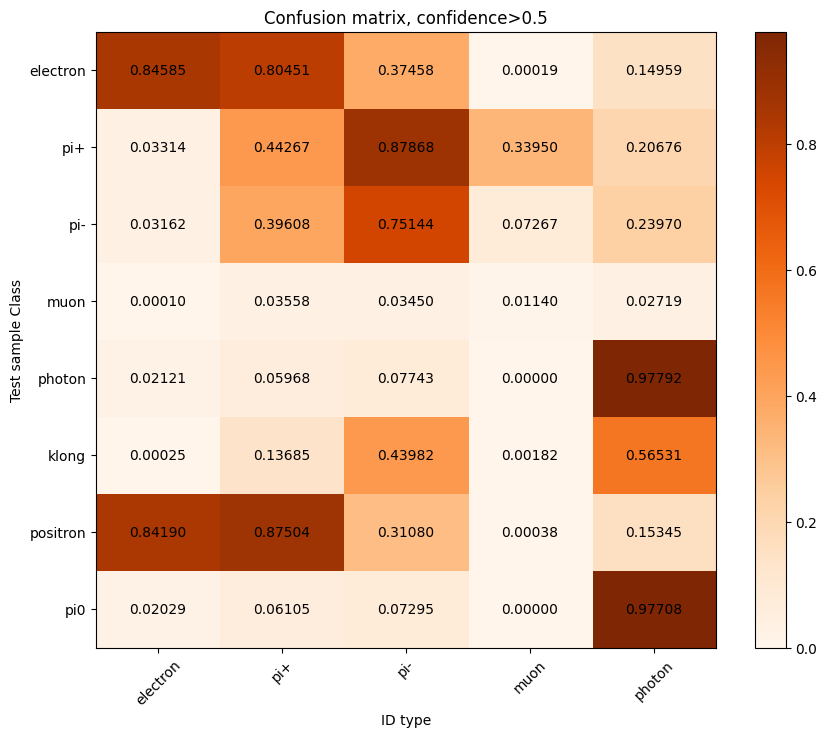

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Your columns
column1 = [0.033142664872139974, 0.8458464173565515, 0.03161830447858246,
           0.0002488181139586962, 0.020291238959178802, 9.996001599360256e-05,
           0.841895356566328, 0.021213284699558455]

column2 = [0.4426681891711866, 0.8045087483176312, 0.39608225636023736, 0.1368452618952419, 0.06104818583221348, 0.03558099029609355, 0.8750356091539265, 0.05968011458582]
column3 = [0.8786754210676563, 0.37457940780619114, 0.7514427375436885, 0.4398240703718513, 0.07295066231522365, 0.034502778468939205, 0.31079669547051564, 0.07742500198933715]
column4 = [0.3395020188425303, 0.0001903130649919117, 0.07266520360887588, 0.0018246661690304387, 0.0, 0.011395441823270692, 0.00037983097521602886, 0.0]

column5 = [0.20676312247644685, 0.14958606908364258, 0.23969763472323824, 0.5653147549141577, 0.9770828359990451, 0.027189124350259896, 0.15345171398727567, 0.9779228258782876]
data = np.column_stack((column1, column2, column3, column4, column5))
data[[0, 1]] = data[[1, 0]]#swap pi+ with electron
data[[3, 5]] = data[[5, 3]]#swap pi+ with electron
data[[4, 7]] = data[[7, 4]]#swap pi+ with electron
cm=data
# Class labels for rows
row_labels = ["electron", "pi+",  "pi-", "muon", "photon", "klong", "positron", "pi0"]

# Column labels
column_labels = ["electron", "pi+", "pi-", "muon", "photon"]

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 8)) # Increase the figure size for clarity
cax = ax.imshow(cm, cmap=plt.cm.Oranges, aspect='auto')

# Add color bar
fig.colorbar(cax)

# Add text annotations.
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val:.5f}", ha='center', va='center', color='black')

# Set ticks and labels
ax.set_xticks(np.arange(len(column_labels)))
ax.set_yticks(np.arange(len(row_labels)))
ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)

# Rotate the tick labels for clarity on the x-axis
plt.xticks(rotation=45)

# Set axis labels
plt.xlabel('ID type')
plt.ylabel('Test sample Class')

plt.title('Confusion matrix, confidence>0.5')
plt.savefig("5_col_confm.png")


In [ ]:
pp_column = [0.4426681891711866, 0.8045087483176312, 0.39608225636023736, 0.1368452618952419, 0.06104818583221348, 0.03558099029609355, 0.8750356091539265, 0.05968011458582]
pm_column = [0.8786754210676563, 0.37457940780619114, 0.7514427375436885, 0.4398240703718513, 0.07295066231522365, 0.034502778468939205, 0.31079669547051564, 0.07742500198933715]
e_column = [0.8458464173565515, 0.033142664872139974, 0.03161830447858246, 9.996001599360256e-05, 0.021213284699558455, 0.0002488181139586962, 0.841895356566328, 0.020291238959178802]
m_column = [0.0, 0.016150740242261104, 0.049418840933105744, 0.8774490203918432, 0.0, 0.001492908683752177, 0.0, 0.0]
ph_column = [0.14958606908364258, 0.20676312247644685, 0.23969763472323824, 0.027189124350259896, 0.9779228258782876, 0.5653147549141577, 0.15345171398727567, 0.9770828359990451]

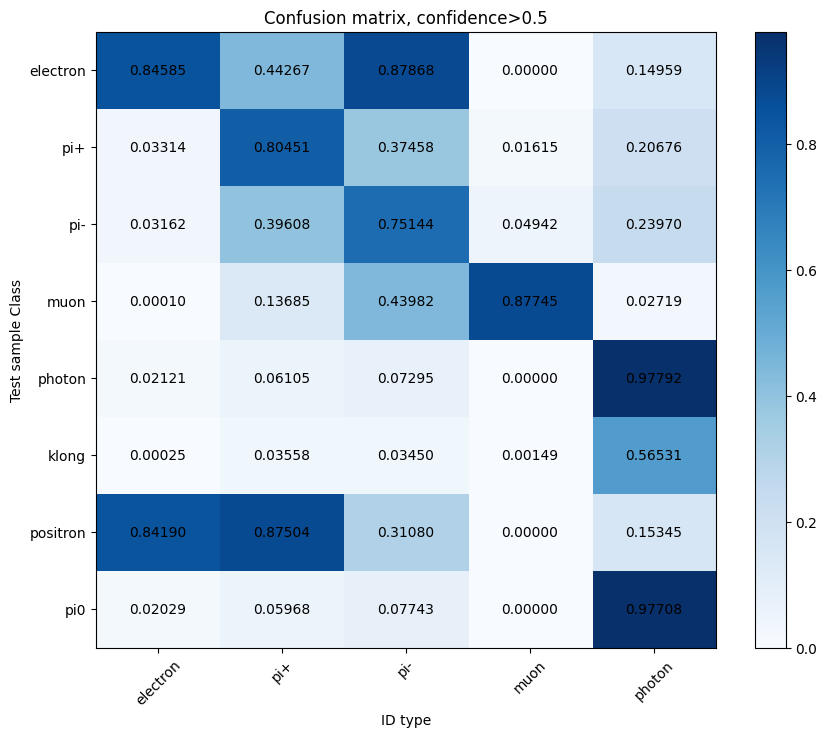

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Your columns
pp_column = [0.4426681891711866, 0.8045087483176312, 0.39608225636023736, 0.1368452618952419, 0.06104818583221348, 0.03558099029609355, 0.8750356091539265, 0.05968011458582]
pm_column = [0.8786754210676563, 0.37457940780619114, 0.7514427375436885, 0.4398240703718513, 0.07295066231522365, 0.034502778468939205, 0.31079669547051564, 0.07742500198933715]
e_column = [0.8458464173565515, 0.033142664872139974, 0.03161830447858246, 9.996001599360256e-05, 0.021213284699558455, 0.0002488181139586962, 0.841895356566328, 0.020291238959178802]
m_column = [0.0, 0.016150740242261104, 0.049418840933105744, 0.8774490203918432, 0.0, 0.001492908683752177, 0.0, 0.0]
ph_column = [0.14958606908364258, 0.20676312247644685, 0.23969763472323824, 0.027189124350259896, 0.9779228258782876, 0.5653147549141577, 0.15345171398727567, 0.9770828359990451]
data = np.column_stack((e_column, pp_column, pm_column, m_column, ph_column))

cm=data
# Class labels for rows
row_labels = ["electron", "pi+",  "pi-", "muon", "photon", "klong", "positron", "pi0"]

# Column labels
column_labels = ["electron", "pi+", "pi-", "muon", "photon"]

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 8)) # Increase the figure size for clarity
cax = ax.imshow(cm, cmap=plt.cm.Blues, aspect='auto')

# Add color bar
fig.colorbar(cax)

# Add text annotations.
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val:.5f}", ha='center', va='center', color='black')

# Set ticks and labels
ax.set_xticks(np.arange(len(column_labels)))
ax.set_yticks(np.arange(len(row_labels)))
ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)

# Rotate the tick labels for clarity on the x-axis
plt.xticks(rotation=45)

# Set axis labels
plt.xlabel('ID type')
plt.ylabel('Test sample Class')

plt.title('Confusion matrix, confidence>0.5')
plt.savefig("re_col_confm.png")


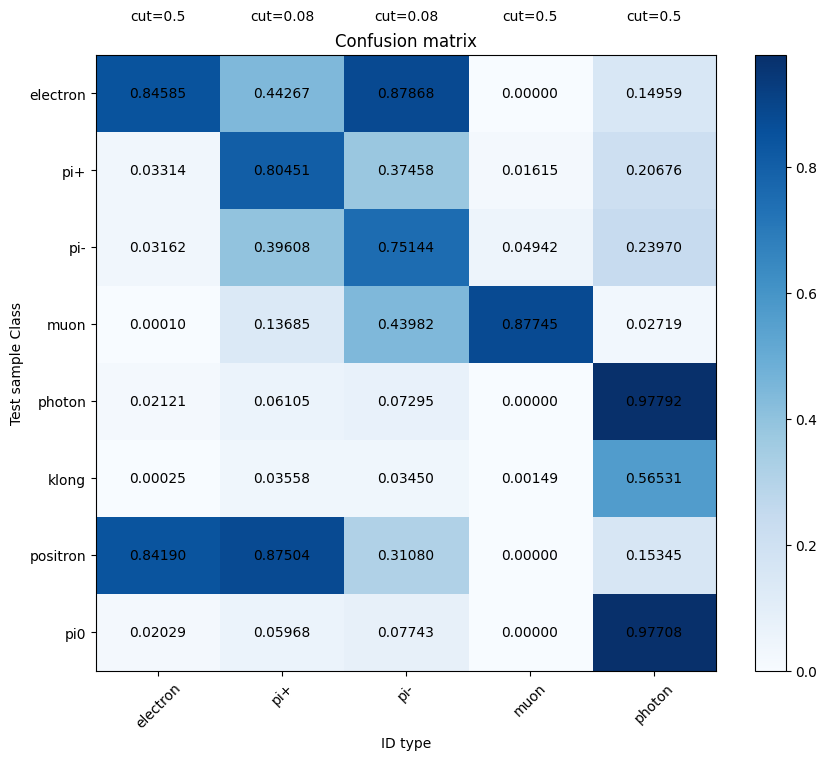

In [126]:
import numpy as np
import matplotlib.pyplot as plt

# Your data and setup remains the same
# ...

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 8)) # Increase the figure size for clarity
cax = ax.imshow(cm, cmap=plt.cm.Blues, aspect='auto')

# Add color bar
fig.colorbar(cax)

# Add text annotations for cells.
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val:.5f}", ha='center', va='center', color='black')

# Set ticks and labels
ax.set_xticks(np.arange(len(column_labels)))
ax.set_yticks(np.arange(len(row_labels)))
ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_labels)

# Rotate the tick labels for clarity on the x-axis
plt.xticks(rotation=45)

# Set axis labels
plt.xlabel('ID type')
plt.ylabel('Test sample Class')

cuts = ["cut=0.5","cut=0.08","cut=0.08","cut=0.5", "cut=0.5"]
# Add labels for each column on the top
for i, label in enumerate(cuts):
    ax.text(i, -1, label, ha='center', va='center', color='black', fontsize=10)

plt.title('Confusion matrix')
plt.savefig("re_col_confm.png")
